In [ ]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import absolute_import, division, print_function

In [ ]:
!pip install ipywidgets
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
# progress bar
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00


In [ ]:
dataset, metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteJR7FFF/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteJR7FFF/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
train_dataset,test_dataset = dataset['train'],dataset['test']

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
type(train_dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
              'Sneaker','Bag','Ankel_boot']

In [ ]:
class_names

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankel_boot']

In [ ]:
num_training_examples = metadata.splits['train'].num_examples
num_testing_examples = metadata.splits['test'].num_examples

In [ ]:
num_testing_examples

10000

In [ ]:
num_training_examples

60000

In [ ]:
print("Numbers of training Examples: {}".format(num_training_examples))
print("Numbers of testing Examples: {}".format(num_testing_examples))

Numbers of training Examples: 60000
Numbers of testing Examples: 10000


In [ ]:
def normalize(images,labels):
    images = tf.cast(images,tf.float32)
    images /= 255
    return images,labels

In [ ]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

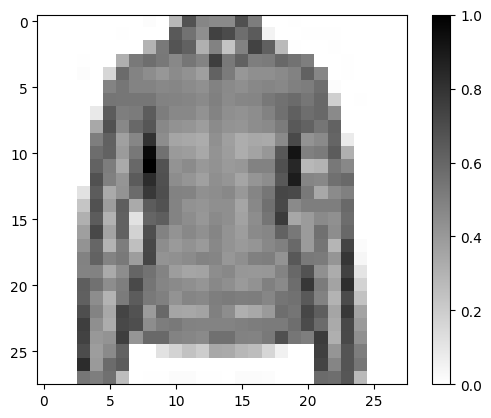

In [ ]:
for image,label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

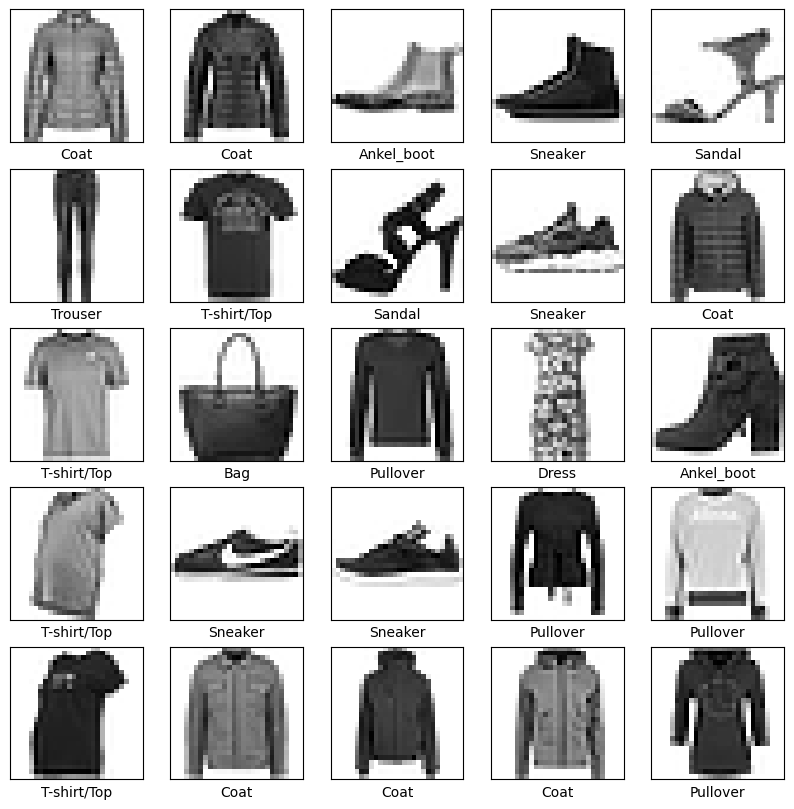

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image,label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image,cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i+=1
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32

In [ ]:
train_dataset = train_dataset.repeat().shuffle(num_training_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_training_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 21s 6ms/step - loss: 0.4995 - accuracy: 0.8228
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3736 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3351 - accuracy: 0.8786
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3171 - accuracy: 0.8832
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2937 - accuracy: 0.8917


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_testing_examples/BATCH_SIZE))

313/313 [==============================] - 4s 9ms/step - loss: 0.3483 - accuracy: 0.8770


In [ ]:
for test_images,test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 [==============================] - 0s 426ms/step


In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([5.9630958e-05, 2.0308532e-06, 3.3748075e-02, 2.0516479e-06,
       9.4814467e-01, 8.2919077e-10, 1.8036377e-02, 1.3587080e-09,
       7.1075788e-06, 7.0990804e-09], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
def plot_image(i,predictions_array, true_labels,images):
    predictions_array,true_labels,img = predictions_array[i],true_labels[i],images[i]
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(img[...,0],cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_labels:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_labels]),color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

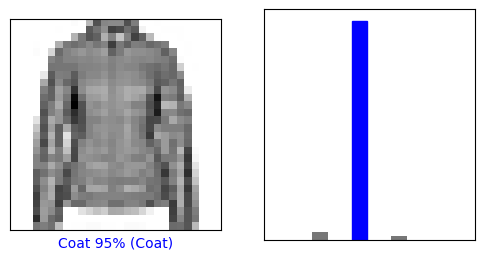

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

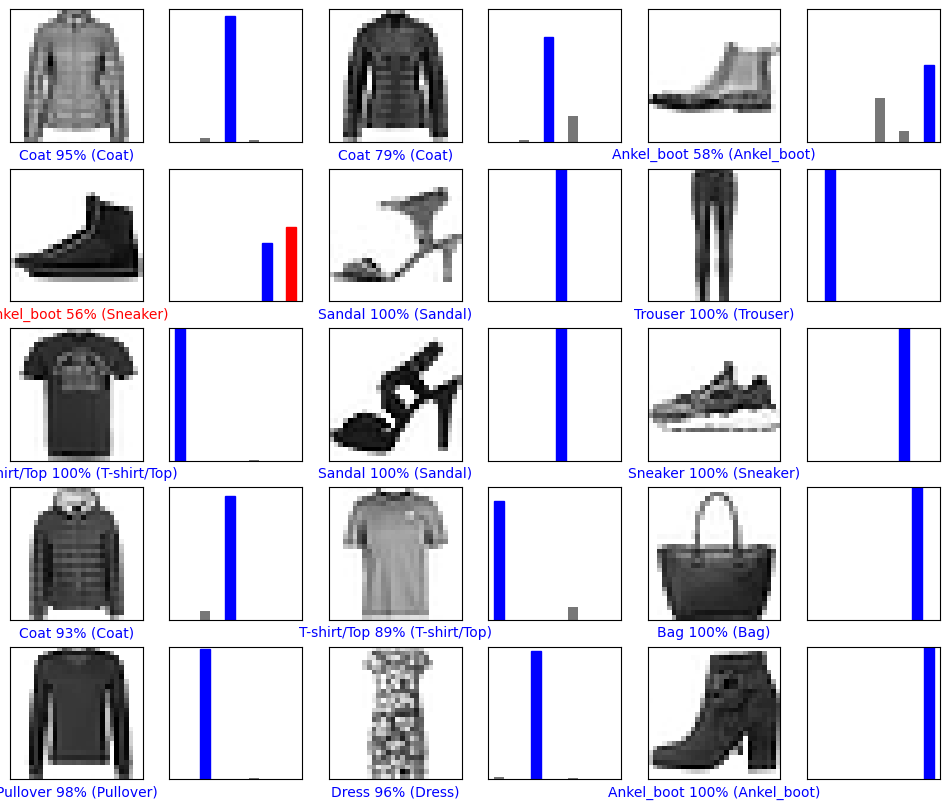

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)

In [ ]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [ ]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [ ]:
prediction_single = model.predict(img)
print(prediction_single)

1/1 [==============================] - 0s 89ms/step
[[5.9631009e-05 2.0308532e-06 3.3748105e-02 2.0516477e-06 9.4814461e-01
  8.2919227e-10 1.8036388e-02 1.3587130e-09 7.1075851e-06 7.0991062e-09]]


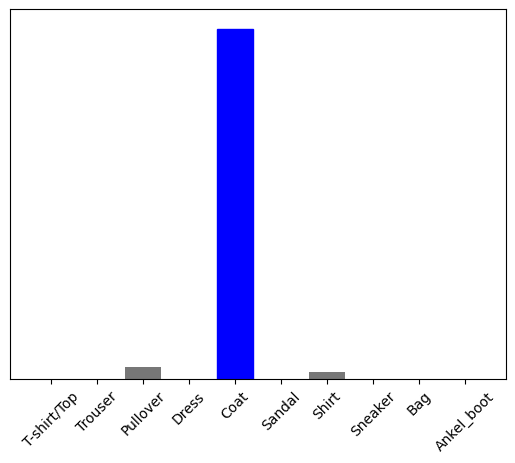

In [ ]:
plot_value_array(0,prediction_single,test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)